# Mineração de dados - Kickstarter Projects

Universidade do Vale do Taquari – Univates

Inteligência Artificial 2020/B

Autores: Arthur Meurer Saraiva, Marcelo Zerbieli Nicaretta e Matheus Michels

## Seleção

Usaremos a base de projetos do Kickstarter, o maior site de financiamento coletivo do mundo, para identificar os motivos do sucesso ou fracasso dos projetos.

O Dataset contém os mais de 378 mil projetos do Kickstarter até janeiro de 2018 e está disponível na plataforma [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects).

In [1]:
import pandas as pd

projects = pd.read_csv('ks-projects-201801.csv')

### Atributos da base
- name = nome do projeto;
- category = categoria do projeto;
- main_category = área do projeto;
- currency = moeda para os valores do projeto;
- deadline = data limite para o objetivo ser alcançado;
- goal = quantidade esperada de arrecadação para desenvolvimento do projeto (objetivo);
- launched = data de lançamento do projeto na plataforma;
- pledged = quantidade arrecadada;
- state = estado do projeto (sucesso, cancelamento, falha, em progresso e indefinido);
- backers = número de doadores do projeto;
- country = país dos autores da ideia;
- usd_pledged = valor arrecadado convertido para dólares (conversão feita pelo KS);
- usd_pledged_real = valor arrecadado convertido para dólares (conversão feita pela api [Fixer](https://fixer.io/));
- usd_goal_real = valor esperado e arrecadação convertido para dólares (conversão feita pela api [Fixer](https://fixer.io/)).

### Objetivo
O objetivo desse projeto é traçar relações entre os atributos para identificar as características mais presentes no sucesso ou no fracasso de um projeto em uma startup.

### Hipótesis
- Projetos com maior número de apoiadores, possuem mais chance de sucesso;
- Quanto maior a duração, mais chance de sucesso;
- O sucesso ou fracasso do projeto está fortemente ligado ao alcance ou não da meta.

## Preparação dos dados

In [2]:
print("\nShape")
print(projects.shape)

print("\nData types")
print(projects.dtypes)


Shape
(378661, 15)

Data types
ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object


### Atributos relevantes
Desta base de projetos usaremos os seguintes atributos:
- main_category = área de atuação do projeto;
- deadline = data limite para o objetivo ser alcançado;
- goal = quantidade esperada de arrecadação para desenvolvimento do projeto (objetivo);
- launched = data de lançamento do projeto na plataforma;
- pledged = quantidade arrecadada;
- state = estado do projeto (sucesso, cancelamento, falha, em progresso e indefinido);
- backers = número de doadores do projeto;
- country = país dos autores da ideia.

In [3]:
projects = projects[['main_category', 'deadline', 'goal', 'launched', 'state', 'backers', 'country', 'pledged']]

print(projects.head())

  main_category    deadline     goal             launched     state  backers  \
0    Publishing  2015-10-09   1000.0  2015-08-11 12:12:28    failed        0   
1  Film & Video  2017-11-01  30000.0  2017-09-02 04:43:57    failed       15   
2  Film & Video  2013-02-26  45000.0  2013-01-12 00:20:50    failed        3   
3         Music  2012-04-16   5000.0  2012-03-17 03:24:11    failed        1   
4  Film & Video  2015-08-29  19500.0  2015-07-04 08:35:03  canceled       14   

  country  pledged  
0      GB      0.0  
1      US   2421.0  
2      US    220.0  
3      US      1.0  
4      US   1283.0  


In [4]:
projects.isnull().sum()

main_category    0
deadline         0
goal             0
launched         0
state            0
backers          0
country          0
pledged          0
dtype: int64

### Visualização gráfica

In [5]:
import matplotlib 
from matplotlib import pyplot as plt

#### Categorias

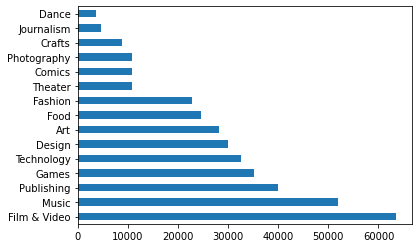

In [6]:
category = projects['main_category']
fig = plt.figure()
fig.add_axes(category.value_counts().plot.barh())
plt.show()

#### Deadline

In [7]:
deadlines = projects['deadline']
print('Data mínima: ' + deadlines.min())
print('Data máxima: ' + deadlines.max())

Data mínima: 2009-05-03
Data máxima: 2018-03-03


#### Goal

In [8]:
goal = projects['goal']

print('Mínimo: %d' % goal.min())
print('Máximo: %d' % goal.max())
print('Média: %d' % goal.mean())
print('Mediana: %d' % goal.median())
print('Moda: %d' % goal.mode())

Mínimo: 0
Máximo: 100000000
Média: 49080
Mediana: 5200
Moda: 5000


#### Launched

In [9]:
launched = projects['launched']
print('Data mínima: ' + launched.min())
print('Data máxima: ' + launched.max())

Data mínima: 1970-01-01 01:00:00
Data máxima: 2018-01-02 15:02:31


#### Pledged

In [48]:
pledged = projects['pledged']

print(pledged.describe())

count    3.314650e+05
mean     1.058072e+04
std      1.015112e+05
min      0.000000e+00
25%      5.000000e+01
50%      7.820000e+02
75%      4.658000e+03
max      2.033899e+07
Name: pledged, dtype: float64


#### State

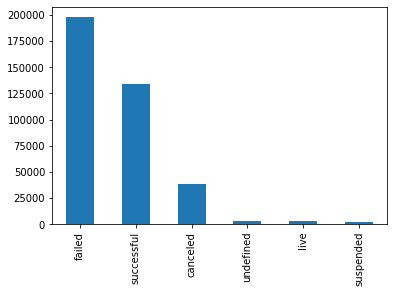

In [11]:
state = projects['state']
fig = plt.figure()
fig.add_axes(state.value_counts().plot.bar())
plt.show()

#### Backers

In [12]:
backers = projects['backers']

print('Mínimo: %d' % backers.min())
print('Máximo: %d' % backers.max())
print('Média: %d' % backers.mean())
print('Mediana: %d' % backers.median())
print('Moda: %d' % backers.mode())

Mínimo: 0
Máximo: 219382
Média: 105
Mediana: 12
Moda: 0


#### Country

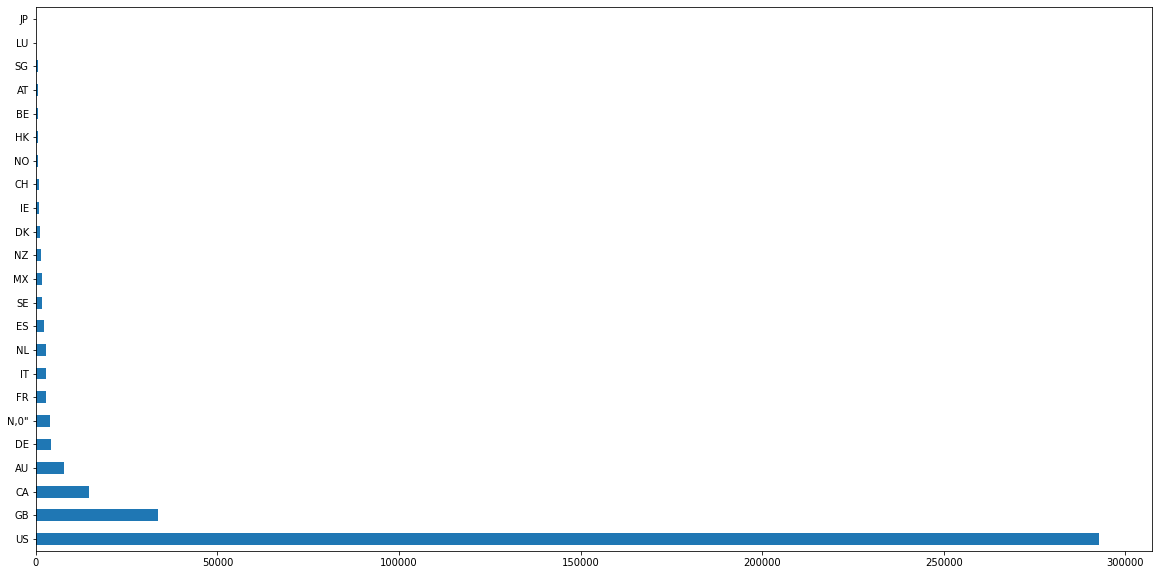

In [13]:
country = projects['country']
fig = plt.figure(figsize=[20, 10])
fig.add_axes(country.value_counts().plot.barh())
plt.show()

### Limpeza dos dados

Identificamos algumas colunas com valores que serão descartados:
- goal: valores zerados;
- launched: valores com data = '1970-01-01 01:00:00' (data 'zero');
- state: manteremos apenas projetos com state = 'successful' ou 'failed';
- country: remover valores N,0"

In [14]:
# filter goal
projects = projects[projects['goal'] > 0]
print(projects['goal'].min())

# filter launched
projects = projects[projects['launched'] != '1970-01-01 01:00:00']
print(projects['launched'].min())

# filter state
projects = projects[projects['state'].isin(['successful', 'failed'])]
print(projects['state'].unique())

# filter country
projects = projects[projects['country'] != 'N,0"']
print(projects['country'].unique())

0.01
2009-04-21 21:02:48
['failed' 'successful']
['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'SE' 'FR' 'NZ' 'CH'
 'AT' 'BE' 'DK' 'HK' 'NL' 'LU' 'SG' 'JP']


### Transformação

Precisamos modificar os seguintes atributos:
- Category: categorizar valores;
- Country: categorizar valores;
- State: categorizar valores;
- Deadline: converter string para valores numéricos;
- Launched: converter string para valores numéricos;

Além disso, criaremos novos atributos para duração e resultado do projeto:
- duration = diferença entre deadline e launched;
- result = não atingiu a meta = -1 | atingiu exatemente a meta = 0 | atingiu e passou a meta = 1;

In [15]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

# Category
projects['category_code'] = labelEncoder.fit_transform(projects['main_category'])

# Country
projects['country_code'] = labelEncoder.fit_transform(projects['country'])

# State
projects['state_code'] = labelEncoder.fit_transform(projects['state'])

print(projects.head())

  main_category    deadline     goal             launched       state  \
0    Publishing  2015-10-09   1000.0  2015-08-11 12:12:28      failed   
1  Film & Video  2017-11-01  30000.0  2017-09-02 04:43:57      failed   
2  Film & Video  2013-02-26  45000.0  2013-01-12 00:20:50      failed   
3         Music  2012-04-16   5000.0  2012-03-17 03:24:11      failed   
5          Food  2016-04-01  50000.0  2016-02-26 13:38:27  successful   

   backers country  pledged  category_code  country_code  state_code  
0        0      GB      0.0             12             9           0  
1       15      US   2421.0              6            21           0  
2        3      US    220.0              6            21           0  
3        1      US      1.0             10            21           0  
5      224      US  52375.0              7            21           1  


In [16]:
# Deadline
projects['deadline'] = pd.to_datetime(projects['deadline'])
projects['deadline_time'] = pd.to_numeric(projects['deadline'])

print(projects['deadline'].dtype)
print(projects['deadline_time'].dtype)

datetime64[ns]
int64


In [17]:
# Launched
projects['launched'] = pd.to_datetime(projects['launched'])
projects['launched_time'] = pd.to_numeric(projects['launched'])

print(projects['launched'].dtype)
print(projects['launched_time'].dtype)

datetime64[ns]
int64


In [18]:
# Duration
projects['duration'] = [deadline - launched for (deadline, launched) in zip(projects['deadline'], projects['launched'])]
projects['duration_time'] = pd.to_numeric(projects['duration'])

print(projects['duration'].dtype)
print(projects['duration_time'].dtype)

timedelta64[ns]
int64


In [19]:
# Result
projects['result'] = [pledged - goal for (pledged, goal) in zip(projects['pledged'], projects['goal'])]
projects['result'] = [result if result == 0 else (result / abs(result)) for result in projects['result']]
print(projects['result'].unique())

[-1.  1.  0.]


#### Estatísticas gerais do dataset

In [20]:
print(projects.dtypes)

main_category             object
deadline          datetime64[ns]
goal                     float64
launched          datetime64[ns]
state                     object
backers                    int64
country                   object
pledged                  float64
category_code              int32
country_code               int32
state_code                 int32
deadline_time              int64
launched_time              int64
duration         timedelta64[ns]
duration_time              int64
result                   float64
dtype: object


## Mineração de dados

### Árvore de decisão

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc

import numpy as np

In [22]:
# atributos da criação de um projeto
features = ['category_code', 'deadline_time', 'goal', 'launched_time', 'country_code', 'duration_time']

x = projects[features]
y = projects['state_code']

# 80% dos dados para treinamento e 20% para validação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Usaremos AUC (Area Under Curve) para encontrar os melhores parâmetros da árvore

https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [23]:
def test_parameter(dt, train_results, test_results):
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

def plot_test_results(xlabel, parameter_values, train_results, test_results):
    line1, = plt.plot(parameter_values, train_results, 'b', label='Train AUC')
    line2, = plt.plot(parameter_values, test_results, 'r', label='Test AUC')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel(xlabel)
    plt.show()

#### max_depth

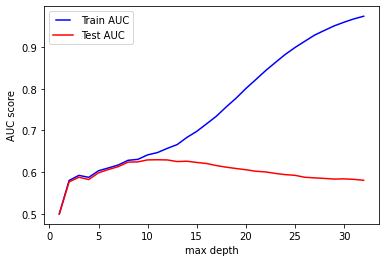

In [24]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   test_parameter(DecisionTreeClassifier(max_depth=max_depth), train_results, test_results)

plot_test_results('max depth', max_depths, train_results, test_results)

#### min_samples_split

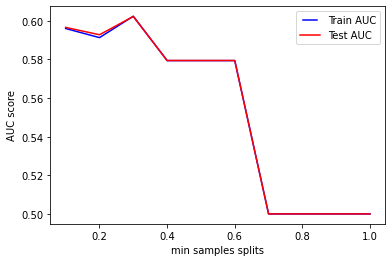

In [26]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   test_parameter(DecisionTreeClassifier(max_depth=15, min_samples_split=min_samples_split), train_results, test_results)

plot_test_results('min samples splits', min_samples_splits, train_results, test_results)

#### min_samples_leaf

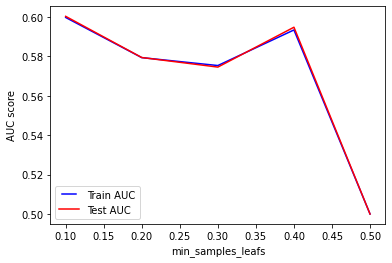

In [27]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   test_parameter(DecisionTreeClassifier(max_depth=15, min_samples_split=0.3, min_samples_leaf=min_samples_leaf), train_results, test_results)

plot_test_results('min_samples_leafs', min_samples_leafs, train_results, test_results)

#### Parâmetros definidos
- max_depth = 10
- min_samples_split = 0.3
- min_samples_leaf = 0.1

In [32]:
tree_classifier = DecisionTreeClassifier(max_depth=15, min_samples_split=0.3, min_samples_leaf=0.1)

result = tree_classifier.fit(x_train, y_train)

predicted = cross_val_predict(tree_classifier, x_train, y_train)
expected = y_train.values

print('Matriz de confusão')
print(confusion_matrix(expected, predicted))

print('\nMétricas')
print(classification_report(expected, predicted))

print('\nAcurácia')
print(accuracy_score(expected, predicted))

print('\nImportância dos atributos')
for feature, importance in zip(features, tree_classifier.feature_importances_):
    print(feature, '-', importance)

Matriz de confusão
[[117577  40658]
 [ 59935  47002]]

Métricas
              precision    recall  f1-score   support

           0       0.66      0.74      0.70    158235
           1       0.54      0.44      0.48    106937

    accuracy                           0.62    265172
   macro avg       0.60      0.59      0.59    265172
weighted avg       0.61      0.62      0.61    265172


Acurácia
0.620649993211953

Importância dos atributos
category_code - 0.0
deadline_time - 0.16460294626249736
goal - 0.7716870596835133
launched_time - 0.0
country_code - 0.0
duration_time - 0.06370999405398937


#### Exibição da árvore

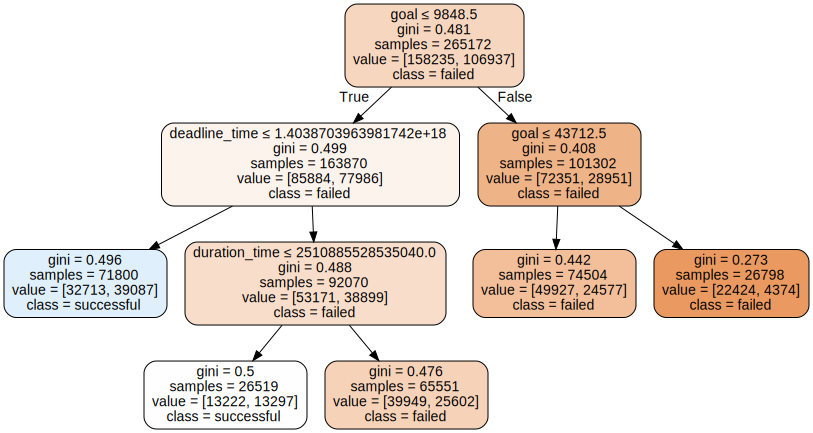

In [31]:
import graphviz
dot_data = tree.export_graphviz(tree_classifier, feature_names=features, class_names=['failed', 'successful'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [38]:
predicted = tree_classifier.predict(x_test)
expected = y_test.values

print('Matriz de confusão')
print(confusion_matrix(expected, predicted))

print('\nMétricas')
print(classification_report(expected, predicted))

print('\nAcurácia')
print(accuracy_score(expected, predicted))

Matriz de confusão
[[27812 11604]
 [13694 13183]]

Métricas
              precision    recall  f1-score   support

           0       0.67      0.71      0.69     39416
           1       0.53      0.49      0.51     26877

    accuracy                           0.62     66293
   macro avg       0.60      0.60      0.60     66293
weighted avg       0.61      0.62      0.62     66293


Acurácia
0.6183910820146924


### Regressão Logística

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# atributos da criação de um projeto
features = ['category_code', 'deadline_time', 'goal', 'launched_time', 'country_code', 'duration_time']

x = projects[features]
y = projects['state_code']

# 80% dos dados para treinamento e 20% para validação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

predicted = logmodel.predict(x_train)
expected = y_train.values

print('Matriz de confusão')
print(confusion_matrix(expected, predicted))

print('\nMétricas')
print(classification_report(expected, predicted))

print('\nAcurácia')
print(accuracy_score(expected, predicted))

Matriz de confusão
[[155498   2700]
 [104303   2671]]

Métricas
              precision    recall  f1-score   support

           0       0.60      0.98      0.74    158198
           1       0.50      0.02      0.05    106974

    accuracy                           0.60    265172
   macro avg       0.55      0.50      0.40    265172
weighted avg       0.56      0.60      0.46    265172


Acurácia
0.5964770036052072


In [47]:
predicted = logmodel.predict(x_test)
expected = y_test.values

print('Matriz de confusão')
print(confusion_matrix(expected, predicted))

print('\nMétricas')
print(classification_report(expected, predicted))

print('\nAcurácia')
print(accuracy_score(expected, predicted))

Matriz de confusão
[[38707   709]
 [26173   704]]

Métricas
              precision    recall  f1-score   support

           0       0.60      0.98      0.74     39416
           1       0.50      0.03      0.05     26877

    accuracy                           0.59     66293
   macro avg       0.55      0.50      0.40     66293
weighted avg       0.56      0.59      0.46     66293


Acurácia
0.594497156562533
